# Testing the MLE Inference Outcome from Havercroft's and Didelez's Model

In [1]:
import math

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import numpyro
import numpyro.distributions as dist
from numpyro.infer import SVI, Trace_ELBO, autoguide, Predictive
import pandas as pd
import tqdm

from frugalCopyla import copula_functions
from frugalCopyla.model	import CopulaModel

import utils_inference as utils_inf

/Users/danielmanela/.virtualenvs/frugalCopyla/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We define two models for both the randomised and observational Havercroft and Didelez example. The difference between the two here is that generative Bernouilli for $B$ in the randomised setup is constant.

In [2]:
obs_mod = utils_inf.create_didelez_model(is_rct=False)
rct_mod = utils_inf.create_didelez_model(is_rct=True)

N_RUNS = 100
N_SAMPLES = 100_000 # Sampled from 4 separate chains, so len(data) is equal to 400_000

Storing the true parameters used to generate the model for comparison later on:

In [3]:
true_params = {
    'a_const_sigmoid': 0.0,
    'alpha_0': 0.3,
    'alpha_a': 0.2,
    'gamma_0': -0.3,
    'gamma_a': 0.4,
    'gamma_l': 0.3,
    'gamma_al': 0.,
    'beta_0': -0.5,
    'beta_a': 0.2,
    'beta_b': 0.3,
    'beta_ab': 0.,
    'rho_ly': round(float(jax.nn.sigmoid(1.)), 2)
}

## Inference Tests

In the following sections, we generate `N_RUNS` different batches of data drawn from the Observational and Randomised model, and calculate an MLE estimate. We bootstrap the parameter estimates for each of the runs and compare the distribution to the true parameter values stated above.

### Observational Model

Let's generate runs from the observational model.

In [4]:
%%time
numpyro.set_host_device_count(4)
obs_results = utils_inf.sim_run(
    obs_mod, 
    utils_inf.obs_didelez_model_inference,
    num_samples=N_SAMPLES,
    svi_iter=1000,
    lr=0.005,
    runs=N_RUNS,
    progress_bar=True
)

100%|█████████████████| 1000/1000 [00:17<00:00, 58.27it/s, init loss: 2819628.7500, avg. loss [951-1000]: 1758390.2500]


Run: 1 / 100. Loss Pct diff: -0.002318838844075799 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.51it/s, init loss: 3283784.0000, avg. loss [951-1000]: 1746401.5000]


Run: 2 / 100. Loss Pct diff: -0.00037939034518785775 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.33it/s, init loss: 2872228.0000, avg. loss [951-1000]: 1747590.8750]


Run: 3 / 100. Loss Pct diff: -0.0005794565659016371 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.27it/s, init loss: 2448845.0000, avg. loss [951-1000]: 1746014.8750]


Run: 4 / 100. Loss Pct diff: -0.00021478692360688 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.36it/s, init loss: 5690721.5000, avg. loss [951-1000]: 1774028.0000]


Run: 5 / 100. Loss Pct diff: -0.006168112624436617 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.32it/s, init loss: 2894350.0000, avg. loss [951-1000]: 1745492.3750]


Run: 6 / 100. Loss Pct diff: -0.00021485250908881426 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.52it/s, init loss: 2599092.0000, avg. loss [951-1000]: 1744212.7500]


Run: 7 / 100. Loss Pct diff: -5.0166585424449295e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.70it/s, init loss: 2768411.5000, avg. loss [951-1000]: 1747177.2500]


Run: 8 / 100. Loss Pct diff: -0.0005509712500497699 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.65it/s, init loss: 2578950.7500, avg. loss [951-1000]: 1747597.0000]


Run: 9 / 100. Loss Pct diff: -0.0009515450219623744 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.15it/s, init loss: 3166811.5000, avg. loss [951-1000]: 1756304.0000]


Run: 10 / 100. Loss Pct diff: -0.0012886327458545566 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.54it/s, init loss: 2569927.7500, avg. loss [951-1000]: nan]


Run: 11 / 100. Loss Pct diff: nan %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.51it/s, init loss: 2570057.0000, avg. loss [951-1000]: nan]


Run: 11 / 100. Loss Pct diff: nan %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.60it/s, init loss: 2570315.5000, avg. loss [951-1000]: nan]


Run: 11 / 100. Loss Pct diff: nan %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.05it/s, init loss: 2568317.7500, avg. loss [951-1000]: nan]


Run: 11 / 100. Loss Pct diff: nan %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.07it/s, init loss: 2570604.5000, avg. loss [951-1000]: nan]


Run: 11 / 100. Loss Pct diff: nan %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.23it/s, init loss: 2570357.0000, avg. loss [951-1000]: nan]


Run: 11 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.22it/s, init loss: 3273904.5000, avg. loss [951-1000]: 1744565.7500]


Run: 11 / 100. Loss Pct diff: -5.732178033213131e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.28it/s, init loss: 2768493.5000, avg. loss [951-1000]: 1745796.0000]


Run: 12 / 100. Loss Pct diff: -0.00017901013779919595 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.12it/s, init loss: 3104377.5000, avg. loss [951-1000]: 1748261.8750]


Run: 13 / 100. Loss Pct diff: -0.00048625681665726006 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.51it/s, init loss: 2875156.7500, avg. loss [951-1000]: 1744955.2500]


Run: 14 / 100. Loss Pct diff: -2.8654230845859274e-05 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.76it/s, init loss: 3092254.7500, avg. loss [951-1000]: nan]


Run: 15 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.40it/s, init loss: 3093428.0000, avg. loss [951-1000]: 1750511.6250]


Run: 15 / 100. Loss Pct diff: -0.0009999683825299144 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.32it/s, init loss: 2991040.0000, avg. loss [951-1000]: 1745889.6250]


Run: 16 / 100. Loss Pct diff: -0.00017184055468533188 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 55.11it/s, init loss: 2164296.0000, avg. loss [951-1000]: nan]


Run: 17 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.35it/s, init loss: 2166970.5000, avg. loss [951-1000]: 1744854.7500]


Run: 17 / 100. Loss Pct diff: -7.163925147324335e-06 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.40it/s, init loss: 2984756.0000, avg. loss [951-1000]: 1746182.5000]


Run: 18 / 100. Loss Pct diff: -0.0005584450555033982 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 55.19it/s, init loss: 2719452.7500, avg. loss [951-1000]: nan]


Run: 19 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.95it/s, init loss: 2709939.2500, avg. loss [951-1000]: 1743203.6250]


Run: 19 / 100. Loss Pct diff: -0.000114735375973396 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.00it/s, init loss: 3245040.7500, avg. loss [951-1000]: 1750870.8750]


Run: 20 / 100. Loss Pct diff: -0.000721211894415319 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.62it/s, init loss: 2194787.5000, avg. loss [951-1000]: nan]


Run: 21 / 100. Loss Pct diff: nan %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.55it/s, init loss: 2192970.7500, avg. loss [951-1000]: nan]


Run: 21 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.80it/s, init loss: 2190949.0000, avg. loss [951-1000]: 1743601.5000]


Run: 21 / 100. Loss Pct diff: -2.150736327166669e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.82it/s, init loss: 3317165.5000, avg. loss [951-1000]: 1748243.0000]


Run: 22 / 100. Loss Pct diff: -0.0010084256064146757 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.26it/s, init loss: 2249489.7500, avg. loss [951-1000]: 1744165.1250]


Run: 23 / 100. Loss Pct diff: 0.0 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.55it/s, init loss: 2813441.5000, avg. loss [951-1000]: 1746708.6250]


Run: 24 / 100. Loss Pct diff: -0.000629858928732574 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.16it/s, init loss: 4058837.7500, avg. loss [951-1000]: 1757289.1250]


Run: 25 / 100. Loss Pct diff: -0.0016794528346508741 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.24it/s, init loss: 4095966.2500, avg. loss [951-1000]: 1770686.8750]


Run: 26 / 100. Loss Pct diff: -0.0021613514982163906 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.31it/s, init loss: 2477781.5000, avg. loss [951-1000]: 1751553.0000]


Run: 27 / 100. Loss Pct diff: -0.0015063999453559518 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.81it/s, init loss: 3533757.2500, avg. loss [951-1000]: 1754410.7500]


Run: 28 / 100. Loss Pct diff: -0.0017036347417160869 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.12it/s, init loss: 6036330.0000, avg. loss [951-1000]: 1756020.1250]


Run: 29 / 100. Loss Pct diff: -0.0014669324737042189 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.57it/s, init loss: 3145068.7500, avg. loss [951-1000]: 1752179.0000]


Run: 30 / 100. Loss Pct diff: -0.0006992517155595124 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.77it/s, init loss: 2525707.5000, avg. loss [951-1000]: 1749175.5000]


Run: 31 / 100. Loss Pct diff: -0.0010865371441468596 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.32it/s, init loss: 2406633.5000, avg. loss [951-1000]: 1743694.2500]


Run: 32 / 100. Loss Pct diff: -1.4337476386572234e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.28it/s, init loss: 2489048.5000, avg. loss [951-1000]: 1745839.8750]


Run: 33 / 100. Loss Pct diff: -9.308077278546989e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 55.98it/s, init loss: 2835212.5000, avg. loss [951-1000]: 1745574.5000]


Run: 34 / 100. Loss Pct diff: -8.593350503360853e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.34it/s, init loss: 2674611.0000, avg. loss [951-1000]: 1745066.8750]


Run: 35 / 100. Loss Pct diff: -2.148921339539811e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.38it/s, init loss: 7117403.0000, avg. loss [951-1000]: 1764093.5000]


Run: 36 / 100. Loss Pct diff: -0.004476376809179783 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.99it/s, init loss: 3848826.0000, avg. loss [951-1000]: 1752564.1250]


Run: 37 / 100. Loss Pct diff: -0.001476994133554399 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 53.35it/s, init loss: 2359508.5000, avg. loss [951-1000]: nan]


Run: 38 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.39it/s, init loss: 2359419.2500, avg. loss [951-1000]: 1744596.1250]


Run: 38 / 100. Loss Pct diff: -1.4329981240734924e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.07it/s, init loss: 2970236.0000, avg. loss [951-1000]: 1757734.5000]


Run: 39 / 100. Loss Pct diff: -0.0020918836817145348 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.12it/s, init loss: 3144082.7500, avg. loss [951-1000]: 1747192.6250]


Run: 40 / 100. Loss Pct diff: -0.00033628259552642703 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.65it/s, init loss: 7340456.0000, avg. loss [951-1000]: 1772463.3750]


Run: 41 / 100. Loss Pct diff: -0.003910898230969906 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.63it/s, init loss: 2728421.7500, avg. loss [951-1000]: 1755699.6250]


Run: 42 / 100. Loss Pct diff: -0.0022796296980232 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.46it/s, init loss: 2521707.5000, avg. loss [951-1000]: 1748623.3750]


Run: 43 / 100. Loss Pct diff: -0.0005290585686452687 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.01it/s, init loss: 3018908.0000, avg. loss [951-1000]: 1743151.3750]


Run: 44 / 100. Loss Pct diff: -7.888184336479753e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.98it/s, init loss: 2352669.7500, avg. loss [951-1000]: 1744752.6250]


Run: 45 / 100. Loss Pct diff: -8.597428677603602e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.81it/s, init loss: 3133078.7500, avg. loss [951-1000]: 1742027.0000]


Run: 46 / 100. Loss Pct diff: -0.00023680878803133965 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.44it/s, init loss: 3007316.2500, avg. loss [951-1000]: 1750799.6250]


Run: 47 / 100. Loss Pct diff: -0.0010140903759747744 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.89it/s, init loss: 2351516.0000, avg. loss [951-1000]: 1745912.3750]


Run: 48 / 100. Loss Pct diff: -6.443741585826501e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.00it/s, init loss: 2752208.7500, avg. loss [951-1000]: 1747717.1250]


Run: 49 / 100. Loss Pct diff: -0.0009657977498136461 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 55.10it/s, init loss: 2003135.1250, avg. loss [951-1000]: nan]


Run: 50 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.50it/s, init loss: 2000288.7500, avg. loss [951-1000]: 1742458.2500]


Run: 50 / 100. Loss Pct diff: 0.0 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.73it/s, init loss: 5140982.0000, avg. loss [951-1000]: 1764536.3750]


Run: 51 / 100. Loss Pct diff: -0.0031762507278472185 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.74it/s, init loss: 3979038.0000, avg. loss [951-1000]: 1753775.5000]


Run: 52 / 100. Loss Pct diff: -0.00261767883785069 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.22it/s, init loss: 2437215.7500, avg. loss [951-1000]: 1744269.5000]


Run: 53 / 100. Loss Pct diff: -0.0002866747963707894 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.31it/s, init loss: 3015555.2500, avg. loss [951-1000]: 1760245.5000]


Run: 54 / 100. Loss Pct diff: -0.002295051235705614 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.30it/s, init loss: 2741589.7500, avg. loss [951-1000]: 1747283.2500]


Run: 55 / 100. Loss Pct diff: -0.0004292860103305429 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.88it/s, init loss: 3271095.5000, avg. loss [951-1000]: 1746170.5000]


Run: 56 / 100. Loss Pct diff: -0.00039375986671075225 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.34it/s, init loss: 2582738.0000, avg. loss [951-1000]: 1748147.0000]


Run: 57 / 100. Loss Pct diff: -0.0006436462281271815 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.92it/s, init loss: 4668295.5000, avg. loss [951-1000]: 1756120.3750]


Run: 58 / 100. Loss Pct diff: -0.003526699263602495 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.31it/s, init loss: 2377290.5000, avg. loss [951-1000]: 1743973.6250]


Run: 59 / 100. Loss Pct diff: -2.867029616027139e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.62it/s, init loss: 3349191.2500, avg. loss [951-1000]: 1745554.8750]


Run: 60 / 100. Loss Pct diff: -0.0007663910510018468 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.83it/s, init loss: 2975954.7500, avg. loss [951-1000]: 1746833.0000]


Run: 61 / 100. Loss Pct diff: -0.00021468650083988905 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.53it/s, init loss: 2817609.7500, avg. loss [951-1000]: 1748912.7500]


Run: 62 / 100. Loss Pct diff: -0.0007434611325152218 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.79it/s, init loss: 4358947.0000, avg. loss [951-1000]: 1779003.8750]


Run: 63 / 100. Loss Pct diff: -0.004466903395950794 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.54it/s, init loss: 5156511.5000, avg. loss [951-1000]: 1763933.2500]


Run: 64 / 100. Loss Pct diff: -0.003269628621637821 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.46it/s, init loss: 2789310.0000, avg. loss [951-1000]: 1745970.3750]


Run: 65 / 100. Loss Pct diff: -0.00015751186583656818 %.


100%|██████████████████████████| 1000/1000 [00:19<00:00, 51.29it/s, init loss: 2163085.5000, avg. loss [951-1000]: nan]


Run: 66 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.49it/s, init loss: 2163494.5000, avg. loss [951-1000]: 1745689.1250]


Run: 66 / 100. Loss Pct diff: -0.00011457146320026368 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.43it/s, init loss: 2445613.0000, avg. loss [951-1000]: 1746037.1250]


Run: 67 / 100. Loss Pct diff: -2.8636501156142913e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.49it/s, init loss: 2635155.7500, avg. loss [951-1000]: 1745836.0000]


Run: 68 / 100. Loss Pct diff: -3.57997851097025e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.28it/s, init loss: 3041784.0000, avg. loss [951-1000]: 1754756.1250]


Run: 69 / 100. Loss Pct diff: -0.001803068327717483 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.56it/s, init loss: 2793718.0000, avg. loss [951-1000]: 1749386.7500]


Run: 70 / 100. Loss Pct diff: -0.0006574877188540995 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 53.20it/s, init loss: 2753745.0000, avg. loss [951-1000]: nan]


Run: 71 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.62it/s, init loss: 4974564.5000, avg. loss [951-1000]: 1778392.3750]


Run: 71 / 100. Loss Pct diff: -0.00666782958433032 %.


100%|█████████████████| 1000/1000 [00:20<00:00, 49.21it/s, init loss: 2957878.2500, avg. loss [951-1000]: 1746043.2500]


Run: 72 / 100. Loss Pct diff: -0.00026490315212868154 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.18it/s, init loss: 2375990.5000, avg. loss [951-1000]: 1745666.8750]


Run: 73 / 100. Loss Pct diff: -7.160707900766283e-05 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.68it/s, init loss: 3686563.2500, avg. loss [951-1000]: 1758951.0000]


Run: 74 / 100. Loss Pct diff: -0.0011373672168701887 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.28it/s, init loss: 4144431.0000, avg. loss [951-1000]: 1769448.6250]


Run: 75 / 100. Loss Pct diff: -0.005298690404742956 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.30it/s, init loss: 2605119.7500, avg. loss [951-1000]: 1748257.8750]


Run: 76 / 100. Loss Pct diff: -0.00018590857507660985 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.18it/s, init loss: 2601790.7500, avg. loss [951-1000]: 1744525.2500]


Run: 77 / 100. Loss Pct diff: -0.0002221363683929667 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.02it/s, init loss: 4228600.5000, avg. loss [951-1000]: 1748978.2500]


Run: 78 / 100. Loss Pct diff: -0.00025016191648319364 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.17it/s, init loss: 2385505.5000, avg. loss [951-1000]: 1744900.7500]


Run: 79 / 100. Loss Pct diff: -2.1491236111614853e-05 %.


100%|█████████████████| 1000/1000 [00:20<00:00, 48.75it/s, init loss: 2870237.5000, avg. loss [951-1000]: 1744969.5000]


Run: 80 / 100. Loss Pct diff: -0.0003797018143814057 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.28it/s, init loss: 2383245.7500, avg. loss [951-1000]: 1744004.7500]


Run: 81 / 100. Loss Pct diff: -0.00033689680276438594 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.05it/s, init loss: 2373140.0000, avg. loss [951-1000]: 1745367.6250]


Run: 82 / 100. Loss Pct diff: -0.000257842184510082 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.20it/s, init loss: 2269168.2500, avg. loss [951-1000]: 1742341.6250]


Run: 83 / 100. Loss Pct diff: -7.174279289756669e-06 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.18it/s, init loss: 2637400.7500, avg. loss [951-1000]: 1745689.1250]


Run: 84 / 100. Loss Pct diff: -0.00017185982142109424 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.36it/s, init loss: 2913272.7500, avg. loss [951-1000]: 1750434.3750]


Run: 85 / 100. Loss Pct diff: -0.0017575258389115334 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.49it/s, init loss: 2299123.7500, avg. loss [951-1000]: 1746878.2500]


Run: 86 / 100. Loss Pct diff: -0.00022899442410562187 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.37it/s, init loss: 2565707.2500, avg. loss [951-1000]: 1745902.2500]


Run: 87 / 100. Loss Pct diff: -7.159765664255247e-05 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.15it/s, init loss: 2371596.0000, avg. loss [951-1000]: 1745151.5000]


Run: 88 / 100. Loss Pct diff: -0.0004656360251829028 %.


100%|█████████████████| 1000/1000 [00:20<00:00, 48.92it/s, init loss: 2796792.0000, avg. loss [951-1000]: 1753176.5000]


Run: 89 / 100. Loss Pct diff: -0.0016405812930315733 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.47it/s, init loss: 3783450.2500, avg. loss [951-1000]: 1751753.6250]


Run: 90 / 100. Loss Pct diff: -0.0010849320096895099 %.


100%|█████████████████| 1000/1000 [00:20<00:00, 49.86it/s, init loss: 7925102.0000, avg. loss [951-1000]: 1787337.5000]


Run: 91 / 100. Loss Pct diff: -0.006381677463650703 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.31it/s, init loss: 3668796.0000, avg. loss [951-1000]: 1751293.7500]


Run: 92 / 100. Loss Pct diff: -0.0015637807082384825 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.21it/s, init loss: 3012872.2500, avg. loss [951-1000]: 1750885.0000]


Run: 93 / 100. Loss Pct diff: -0.0010354744736105204 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.76it/s, init loss: 3513034.7500, avg. loss [951-1000]: nan]


Run: 94 / 100. Loss Pct diff: nan %.


100%|██████████████████████████| 1000/1000 [00:19<00:00, 51.66it/s, init loss: 3515346.5000, avg. loss [951-1000]: nan]


Run: 94 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.54it/s, init loss: 3315411.7500, avg. loss [951-1000]: 1746854.8750]


Run: 94 / 100. Loss Pct diff: -0.00017890159506350756 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.22it/s, init loss: 3076122.7500, avg. loss [951-1000]: 1754281.6250]


Run: 95 / 100. Loss Pct diff: -0.0018891666550189257 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.67it/s, init loss: 2960545.5000, avg. loss [951-1000]: 1746842.5000]


Run: 96 / 100. Loss Pct diff: -0.0002504696021787822 %.


100%|█████████████████| 1000/1000 [00:20<00:00, 49.89it/s, init loss: 3278373.7500, avg. loss [951-1000]: 1748825.6250]


Run: 97 / 100. Loss Pct diff: -0.0002644816704560071 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.10it/s, init loss: 3562420.5000, avg. loss [951-1000]: 1764440.6250]


Run: 98 / 100. Loss Pct diff: -0.0029351338744163513 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.41it/s, init loss: 3480163.2500, avg. loss [951-1000]: 1765654.3750]


Run: 99 / 100. Loss Pct diff: -0.0025998810306191444 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.57it/s, init loss: 2925960.0000, avg. loss [951-1000]: 1750957.1250]


Run: 100 / 100. Loss Pct diff: -0.0010711380746215582 %.
CPU times: user 2h 34min 13s, sys: 13min 44s, total: 2h 47min 58s
Wall time: 59min 42s


#### Losses for all 100 runs appear to all converge by 1000 steps

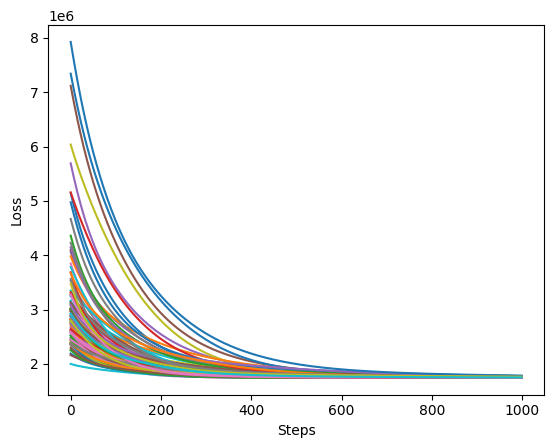

In [5]:
plt.plot(obs_results['losses'].T);
plt.xlabel("Steps");
plt.ylabel("Loss");

In [6]:
obs_params = dict()
for k, v in obs_results['params'].items():
    obs_params[k[:-9]] = obs_results['params'][k]

#### Comparison of parameter estimates to true values

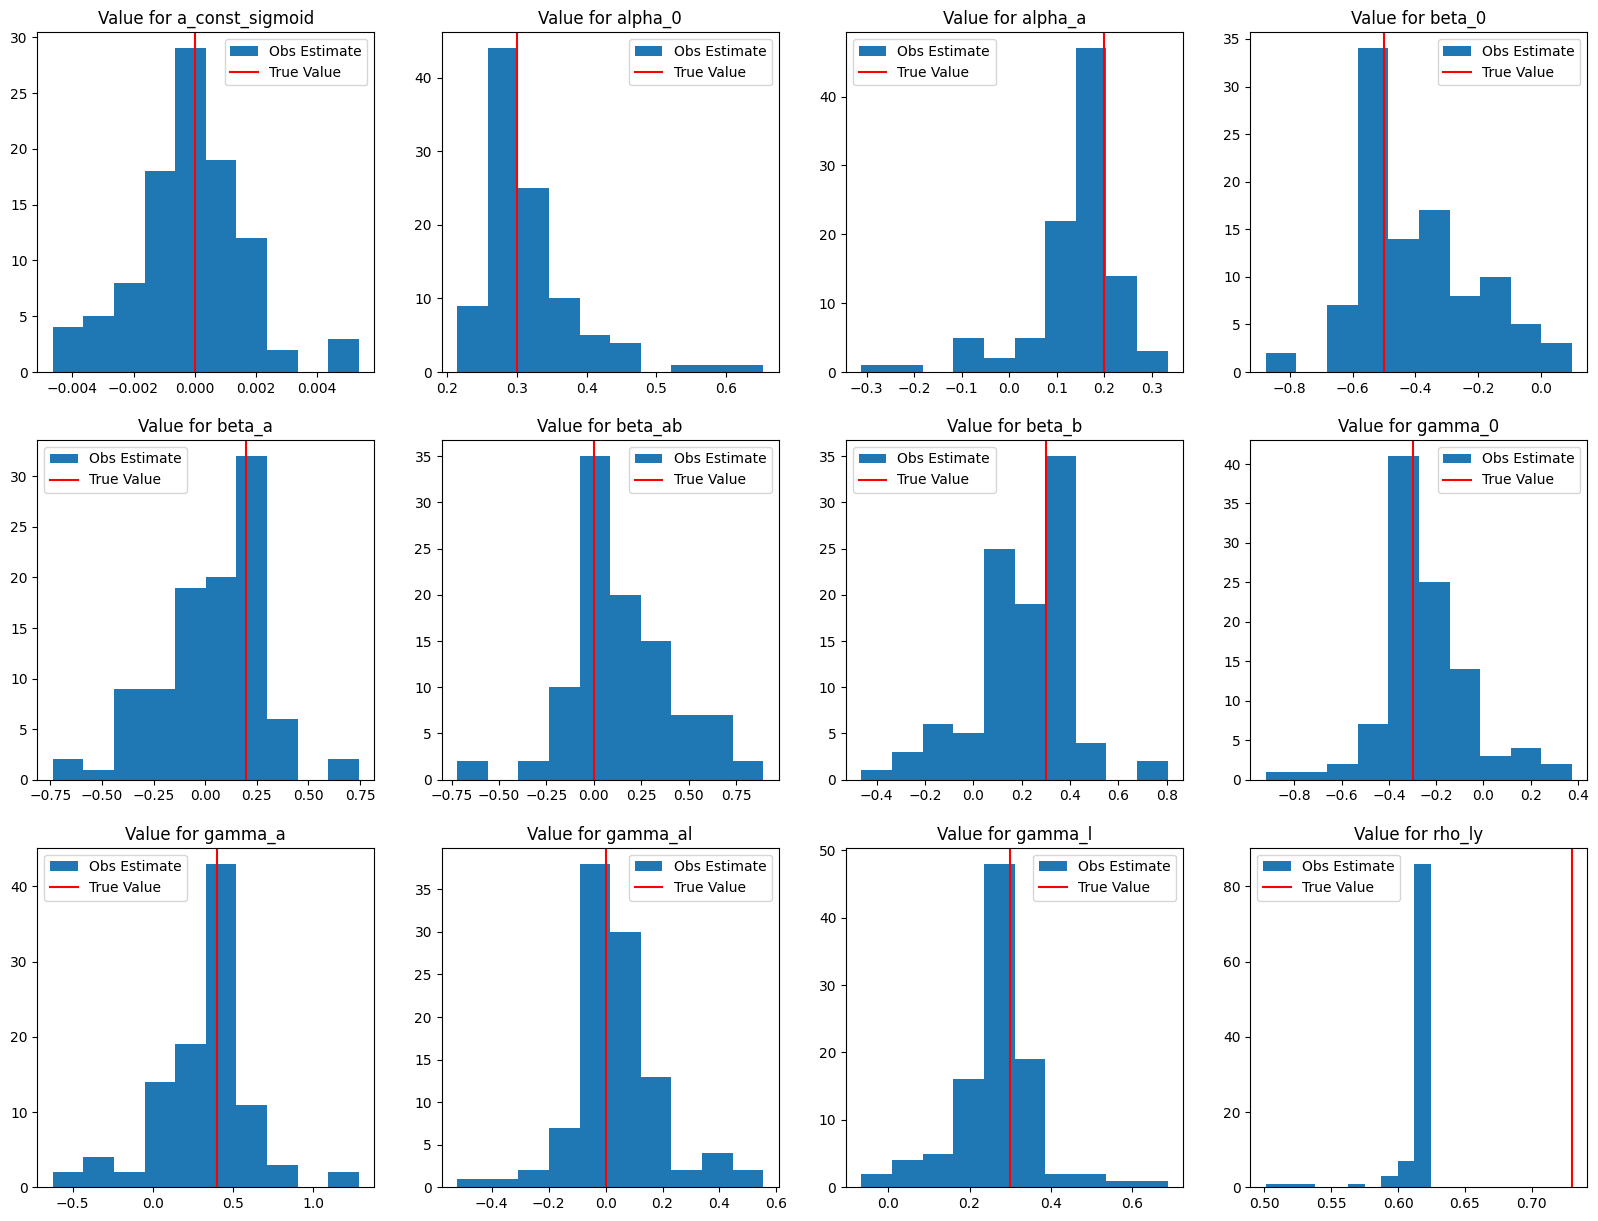

In [7]:
f, axs = plt.subplots(3, 4, figsize=(20, 15))

param_names = list(obs_params.keys())
for i, ax in enumerate(f.axes):
    ax.hist(np.array(obs_params[param_names[i]]), label='Obs Estimate')
    ax.axvline(true_params[param_names[i]], color='r', label='True Value')
    # li.set_label('True Value')
    ax.title.set_text(f'Value for {param_names[i]}')
    ax.legend()

The estimates appear reasonable (albeit some a bit skewed) except for the estimate for `rho_ly` which has a substantial bias.

## Randomised Model

In [8]:
%%time
rct_results = utils_inf.sim_run(
    rct_mod, 
    utils_inf.rct_didelez_model_inference,
    num_samples=N_SAMPLES,
    svi_iter=1000,
    lr=0.005,
    runs=N_RUNS,
    progress_bar=True
)

100%|█████████████████| 1000/1000 [00:18<00:00, 53.38it/s, init loss: 2676833.0000, avg. loss [951-1000]: 1757569.7500]


Run: 1 / 100. Loss Pct diff: -7.112103048712015e-06 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.57it/s, init loss: 3760976.5000, avg. loss [951-1000]: 1758138.7500]


Run: 2 / 100. Loss Pct diff: -0.000554649974219501 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.08it/s, init loss: 3069085.5000, avg. loss [951-1000]: 1756328.7500]


Run: 3 / 100. Loss Pct diff: -0.0003914838016498834 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.46it/s, init loss: 2484832.5000, avg. loss [951-1000]: 1758027.0000]


Run: 4 / 100. Loss Pct diff: -9.954613778972998e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.96it/s, init loss: 2305460.5000, avg. loss [951-1000]: 1755385.8750]


Run: 5 / 100. Loss Pct diff: -0.00015666757826693356 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 55.69it/s, init loss: 3095704.5000, avg. loss [951-1000]: 1760441.6250]


Run: 6 / 100. Loss Pct diff: -0.0005823298124596477 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 55.71it/s, init loss: 3159982.5000, avg. loss [951-1000]: 1753902.3750]


Run: 7 / 100. Loss Pct diff: -0.0001710545038804412 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 55.78it/s, init loss: 2405413.5000, avg. loss [951-1000]: 1756577.5000]


Run: 8 / 100. Loss Pct diff: -0.00025619720690883696 %.


100%|█████████████████| 1000/1000 [00:16<00:00, 59.32it/s, init loss: 2329890.5000, avg. loss [951-1000]: 1754627.8750]


Run: 9 / 100. Loss Pct diff: -0.00014961058332119137 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.71it/s, init loss: 2267959.7500, avg. loss [951-1000]: 1753293.6250]


Run: 10 / 100. Loss Pct diff: 7.129443929443369e-06 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.58it/s, init loss: 4760156.5000, avg. loss [951-1000]: 1759384.3750]


Run: 11 / 100. Loss Pct diff: -0.0008101125713437796 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.49it/s, init loss: 2453195.5000, avg. loss [951-1000]: 1760109.2500]


Run: 12 / 100. Loss Pct diff: -0.0012076999992132187 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.60it/s, init loss: 2132250.5000, avg. loss [951-1000]: 1755087.3750]


Run: 13 / 100. Loss Pct diff: 0.0 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.24it/s, init loss: 3597253.2500, avg. loss [951-1000]: 1764060.6250]


Run: 14 / 100. Loss Pct diff: -0.0014744476648047566 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.48it/s, init loss: 2538351.7500, avg. loss [951-1000]: 1756051.3750]


Run: 15 / 100. Loss Pct diff: -0.00024203590874094516 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.19it/s, init loss: 2091260.0000, avg. loss [951-1000]: 1755853.7500]


Run: 16 / 100. Loss Pct diff: -7.119048859749455e-06 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.51it/s, init loss: 2552293.2500, avg. loss [951-1000]: 1756379.5000]


Run: 17 / 100. Loss Pct diff: -8.540483395336196e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 55.96it/s, init loss: 4041063.0000, avg. loss [951-1000]: 1764152.3750]


Run: 18 / 100. Loss Pct diff: -0.001290001324377954 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.72it/s, init loss: 2364955.7500, avg. loss [951-1000]: 1758002.7500]


Run: 19 / 100. Loss Pct diff: -0.000327105080941692 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.24it/s, init loss: 2814579.5000, avg. loss [951-1000]: 1759104.5000]


Run: 20 / 100. Loss Pct diff: -0.00040507741505280137 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.41it/s, init loss: 2575060.0000, avg. loss [951-1000]: 1755706.2500]


Run: 21 / 100. Loss Pct diff: -2.1359061065595597e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.61it/s, init loss: 3839801.7500, avg. loss [951-1000]: 1758393.6250]


Run: 22 / 100. Loss Pct diff: -0.0004976792843081057 %.


100%|█████████████████| 1000/1000 [00:16<00:00, 59.82it/s, init loss: 2675267.7500, avg. loss [951-1000]: 1759425.6250]


Run: 23 / 100. Loss Pct diff: -0.00072480394737795 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.85it/s, init loss: 2874328.0000, avg. loss [951-1000]: 1756796.5000]


Run: 24 / 100. Loss Pct diff: -9.250010771211237e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.29it/s, init loss: 5467130.0000, avg. loss [951-1000]: 1763139.2500]


Run: 25 / 100. Loss Pct diff: -0.0008935049991123378 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.14it/s, init loss: 3988779.7500, avg. loss [951-1000]: 1766323.3750]


Run: 26 / 100. Loss Pct diff: -0.0012671675067394972 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.67it/s, init loss: 2164703.7500, avg. loss [951-1000]: 1757470.2500]


Run: 27 / 100. Loss Pct diff: -4.2675477743614465e-05 %.


100%|██████████████████████████| 1000/1000 [00:17<00:00, 56.79it/s, init loss: 2653579.5000, avg. loss [951-1000]: nan]


Run: 28 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.02it/s, init loss: 2656830.7500, avg. loss [951-1000]: 1757692.0000]


Run: 28 / 100. Loss Pct diff: -2.8446649594116025e-05 %.


100%|██████████████████████████| 1000/1000 [00:17<00:00, 57.27it/s, init loss: 3574273.2500, avg. loss [951-1000]: nan]


Run: 29 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.05it/s, init loss: 3575522.5000, avg. loss [951-1000]: 1768984.3750]


Run: 29 / 100. Loss Pct diff: -0.0014844733523204923 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.18it/s, init loss: 2270970.7500, avg. loss [951-1000]: 1755157.7500]


Run: 30 / 100. Loss Pct diff: 0.0 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 55.69it/s, init loss: 2126331.0000, avg. loss [951-1000]: 1754547.6250]


Run: 31 / 100. Loss Pct diff: -0.00024936874979175627 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.36it/s, init loss: 3104671.5000, avg. loss [951-1000]: 1761672.1250]


Run: 32 / 100. Loss Pct diff: -0.0014409399591386318 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.16it/s, init loss: 3140679.0000, avg. loss [951-1000]: 1765985.2500]


Run: 33 / 100. Loss Pct diff: -0.0023584836162626743 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 54.39it/s, init loss: 2954314.0000, avg. loss [951-1000]: nan]


Run: 34 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.81it/s, init loss: 2956018.5000, avg. loss [951-1000]: 1757910.1250]


Run: 34 / 100. Loss Pct diff: -0.00026311574038118124 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.00it/s, init loss: 2104842.2500, avg. loss [951-1000]: 1758403.8750]


Run: 35 / 100. Loss Pct diff: -3.554399881977588e-05 %.


100%|█████████████████| 1000/1000 [00:16<00:00, 58.86it/s, init loss: 2249430.5000, avg. loss [951-1000]: 1754329.1250]


Run: 36 / 100. Loss Pct diff: -0.00011400729999877512 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.44it/s, init loss: 3287135.7500, avg. loss [951-1000]: 1759922.3750]


Run: 37 / 100. Loss Pct diff: -0.0007530177244916558 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.14it/s, init loss: 2761040.0000, avg. loss [951-1000]: 1757629.2500]


Run: 38 / 100. Loss Pct diff: -0.00030583288753405213 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.32it/s, init loss: 2366088.7500, avg. loss [951-1000]: 1758586.5000]


Run: 39 / 100. Loss Pct diff: -0.0005331711145117879 %.


100%|█████████████████| 1000/1000 [00:20<00:00, 48.59it/s, init loss: 2595683.0000, avg. loss [951-1000]: 1755130.1250]


Run: 40 / 100. Loss Pct diff: -7.122095121303573e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.40it/s, init loss: 2127795.5000, avg. loss [951-1000]: 1754677.2500]


Run: 41 / 100. Loss Pct diff: -7.1238214331970084e-06 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.23it/s, init loss: 3527477.0000, avg. loss [951-1000]: 1765896.1250]


Run: 42 / 100. Loss Pct diff: -0.0023515832144767046 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.90it/s, init loss: 2923620.5000, avg. loss [951-1000]: 1764069.5000]


Run: 43 / 100. Loss Pct diff: -0.002403630642220378 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.63it/s, init loss: 3480288.5000, avg. loss [951-1000]: 1761112.0000]


Run: 44 / 100. Loss Pct diff: -0.000951344904024154 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.00it/s, init loss: 2117032.2500, avg. loss [951-1000]: 1758810.8750]


Run: 45 / 100. Loss Pct diff: -6.396495882654563e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 55.78it/s, init loss: 2505140.5000, avg. loss [951-1000]: 1756016.6250]


Run: 46 / 100. Loss Pct diff: -3.5592278436524794e-05 %.


100%|██████████████████████████| 1000/1000 [00:18<00:00, 52.97it/s, init loss: 3073894.2500, avg. loss [951-1000]: nan]


Run: 47 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.46it/s, init loss: 3073557.7500, avg. loss [951-1000]: 1756731.0000]


Run: 47 / 100. Loss Pct diff: 0.0 %.


100%|█████████████████| 1000/1000 [00:16<00:00, 60.22it/s, init loss: 2102487.2500, avg. loss [951-1000]: 1755115.0000]


Run: 48 / 100. Loss Pct diff: 0.0 %.


100%|██████████████████████████| 1000/1000 [00:17<00:00, 56.42it/s, init loss: 2068609.6250, avg. loss [951-1000]: nan]


Run: 49 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:17<00:00, 55.60it/s, init loss: 2066324.3750, avg. loss [951-1000]: 1756330.3750]


Run: 49 / 100. Loss Pct diff: 0.0 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 52.73it/s, init loss: 2354327.5000, avg. loss [951-1000]: 1755555.2500]


Run: 50 / 100. Loss Pct diff: -8.544470620108768e-05 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.60it/s, init loss: 2368521.0000, avg. loss [951-1000]: 1752603.8750]


Run: 51 / 100. Loss Pct diff: -9.9854456493631e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.22it/s, init loss: 3356082.7500, avg. loss [951-1000]: 1763393.6250]


Run: 52 / 100. Loss Pct diff: -0.0010352106764912605 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.06it/s, init loss: 3307455.0000, avg. loss [951-1000]: 1760908.7500]


Run: 53 / 100. Loss Pct diff: -0.00127817050088197 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.76it/s, init loss: 5898797.0000, avg. loss [951-1000]: 1763348.6250]


Run: 54 / 100. Loss Pct diff: -0.0018510848749428988 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 52.92it/s, init loss: 2288666.2500, avg. loss [951-1000]: 1756094.2500]


Run: 55 / 100. Loss Pct diff: -1.4236191418603994e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 55.62it/s, init loss: 3077384.7500, avg. loss [951-1000]: 1755485.6250]


Run: 56 / 100. Loss Pct diff: -5.6965054682223126e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.41it/s, init loss: 2944672.5000, avg. loss [951-1000]: 1758189.7500]


Run: 57 / 100. Loss Pct diff: -7.10974054527469e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.29it/s, init loss: 2258338.5000, avg. loss [951-1000]: 1754787.0000]


Run: 58 / 100. Loss Pct diff: 0.0 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.90it/s, init loss: 2945992.7500, avg. loss [951-1000]: 1765700.6250]


Run: 59 / 100. Loss Pct diff: -0.0015793401980772614 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.25it/s, init loss: 2158849.0000, avg. loss [951-1000]: 1754565.7500]


Run: 60 / 100. Loss Pct diff: -5.699498797184788e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 52.92it/s, init loss: 2830240.2500, avg. loss [951-1000]: 1757123.2500]


Run: 61 / 100. Loss Pct diff: -0.0002845772833097726 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.50it/s, init loss: 2666151.0000, avg. loss [951-1000]: 1756230.2500]


Run: 62 / 100. Loss Pct diff: -0.00019218289526179433 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.25it/s, init loss: 2504588.5000, avg. loss [951-1000]: 1755228.1250]


Run: 63 / 100. Loss Pct diff: -6.409536581486464e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.33it/s, init loss: 2634035.5000, avg. loss [951-1000]: 1755079.3750]


Run: 64 / 100. Loss Pct diff: -9.971306280931458e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 52.92it/s, init loss: 2367725.7500, avg. loss [951-1000]: 1752751.5000]


Run: 65 / 100. Loss Pct diff: -2.852696525224019e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 54.42it/s, init loss: 2219534.2500, avg. loss [951-1000]: 1755828.6250]


Run: 66 / 100. Loss Pct diff: -2.135753857146483e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.52it/s, init loss: 2742573.5000, avg. loss [951-1000]: 1754630.5000]


Run: 67 / 100. Loss Pct diff: -4.274460661690682e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.37it/s, init loss: 3111699.7500, avg. loss [951-1000]: 1756270.7500]


Run: 68 / 100. Loss Pct diff: -0.0004484482924453914 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.47it/s, init loss: 3213443.5000, avg. loss [951-1000]: 1774993.1250]


Run: 69 / 100. Loss Pct diff: -0.00214905827306211 %.


100%|██████████████████████████| 1000/1000 [00:17<00:00, 58.09it/s, init loss: 2211437.5000, avg. loss [951-1000]: nan]


Run: 70 / 100. Loss Pct diff: nan %.


100%|██████████████████████████| 1000/1000 [00:17<00:00, 58.63it/s, init loss: 2210136.2500, avg. loss [951-1000]: nan]


Run: 70 / 100. Loss Pct diff: nan %.


100%|██████████████████████████| 1000/1000 [00:16<00:00, 60.03it/s, init loss: 2209201.0000, avg. loss [951-1000]: nan]


Run: 70 / 100. Loss Pct diff: nan %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.25it/s, init loss: 2812813.0000, avg. loss [951-1000]: 1755615.8750]


Run: 70 / 100. Loss Pct diff: -2.8480413675424643e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.00it/s, init loss: 4704726.5000, avg. loss [951-1000]: 1776406.5000]


Run: 71 / 100. Loss Pct diff: -0.00385290733538568 %.


100%|█████████████████| 1000/1000 [00:16<00:00, 59.45it/s, init loss: 2099413.0000, avg. loss [951-1000]: 1757247.2500]


Run: 72 / 100. Loss Pct diff: -2.8453852792154066e-05 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.25it/s, init loss: 2835540.0000, avg. loss [951-1000]: 1757681.2500]


Run: 73 / 100. Loss Pct diff: -0.0001280136057175696 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.04it/s, init loss: 3101506.5000, avg. loss [951-1000]: 1774905.5000]


Run: 74 / 100. Loss Pct diff: -0.00248761591501534 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 57.71it/s, init loss: 2474795.0000, avg. loss [951-1000]: 1751635.5000]


Run: 75 / 100. Loss Pct diff: -7.13630870450288e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 56.18it/s, init loss: 2368253.7500, avg. loss [951-1000]: 1755297.2500]


Run: 76 / 100. Loss Pct diff: -0.00014243157056625932 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.75it/s, init loss: 2467748.0000, avg. loss [951-1000]: 1752502.1250]


Run: 77 / 100. Loss Pct diff: -9.272669558413327e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.53it/s, init loss: 4713780.0000, avg. loss [951-1000]: 1771640.3750]


Run: 78 / 100. Loss Pct diff: -0.004931245464831591 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 50.07it/s, init loss: 2499871.0000, avg. loss [951-1000]: 1757419.6250]


Run: 79 / 100. Loss Pct diff: 7.112706953193992e-06 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 55.13it/s, init loss: 3017089.2500, avg. loss [951-1000]: 1758251.5000]


Run: 80 / 100. Loss Pct diff: -0.0009386727469973266 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.97it/s, init loss: 2313282.5000, avg. loss [951-1000]: 1756796.3750]


Run: 81 / 100. Loss Pct diff: -7.1152503551275e-06 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 52.23it/s, init loss: 2633262.2500, avg. loss [951-1000]: 1754292.5000]


Run: 82 / 100. Loss Pct diff: -1.4250787899072748e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 52.73it/s, init loss: 2882258.5000, avg. loss [951-1000]: 1757951.8750]


Run: 83 / 100. Loss Pct diff: -9.24395426409319e-05 %.


100%|█████████████████| 1000/1000 [00:18<00:00, 53.16it/s, init loss: 2673719.7500, avg. loss [951-1000]: 1755786.8750]


Run: 84 / 100. Loss Pct diff: -0.0004272070655133575 %.


100%|█████████████████| 1000/1000 [00:19<00:00, 51.78it/s, init loss: 2926034.2500, avg. loss [951-1000]: 1758842.1250]


Run: 85 / 100. Loss Pct diff: -0.000262974645011127 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.60it/s, init loss: 2841367.0000, avg. loss [951-1000]: 1758732.6250]


Run: 86 / 100. Loss Pct diff: -0.00027720830985344946 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.78it/s, init loss: 2931817.5000, avg. loss [951-1000]: 1767076.7500]


Run: 87 / 100. Loss Pct diff: -0.0016488874098286033 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.65it/s, init loss: 3273322.0000, avg. loss [951-1000]: 1754066.2500]


Run: 88 / 100. Loss Pct diff: -0.0001781666069291532 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.46it/s, init loss: 3633453.0000, avg. loss [951-1000]: 1763488.7500]


Run: 89 / 100. Loss Pct diff: -0.0008507690508849919 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.52it/s, init loss: 2632130.2500, avg. loss [951-1000]: 1755717.6250]


Run: 90 / 100. Loss Pct diff: -0.00038449958083219826 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.79it/s, init loss: 3903721.2500, avg. loss [951-1000]: 1762885.0000]


Run: 91 / 100. Loss Pct diff: -0.001688342192210257 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.34it/s, init loss: 2519428.0000, avg. loss [951-1000]: 1755220.0000]


Run: 92 / 100. Loss Pct diff: -0.0002492721541784704 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.59it/s, init loss: 3298344.7500, avg. loss [951-1000]: 1758209.0000]


Run: 93 / 100. Loss Pct diff: -0.00027018069522455335 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.35it/s, init loss: 2987723.5000, avg. loss [951-1000]: 1755482.2500]


Run: 94 / 100. Loss Pct diff: -0.00019938693731091917 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.57it/s, init loss: 2494976.5000, avg. loss [951-1000]: 1754769.6250]


Run: 95 / 100. Loss Pct diff: 0.0 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.52it/s, init loss: 3450761.2500, avg. loss [951-1000]: 1757104.7500]


Run: 96 / 100. Loss Pct diff: -0.0002063168940367177 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.70it/s, init loss: 3116575.5000, avg. loss [951-1000]: 1758862.7500]


Run: 97 / 100. Loss Pct diff: -0.0006681596278212965 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.65it/s, init loss: 2354447.2500, avg. loss [951-1000]: 1755731.2500]


Run: 98 / 100. Loss Pct diff: -4.271785292075947e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.51it/s, init loss: 3035287.7500, avg. loss [951-1000]: 1755504.3750]


Run: 99 / 100. Loss Pct diff: -9.256823250325397e-05 %.


100%|█████████████████| 1000/1000 [00:17<00:00, 58.46it/s, init loss: 2294412.7500, avg. loss [951-1000]: 1756087.0000]

Run: 100 / 100. Loss Pct diff: -5.694543506251648e-05 %.
CPU times: user 2h 19min 13s, sys: 12min 11s, total: 2h 31min 25s
Wall time: 53min 26s


#### Again, the losses appear to converge nicely for all `N_RUNS` runs

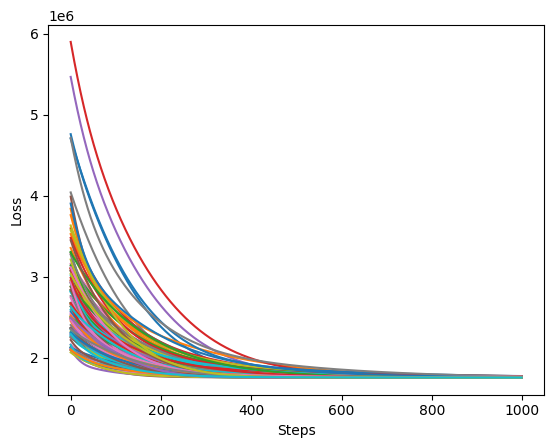

In [9]:
plt.plot(rct_results['losses'].T);
plt.xlabel("Steps");
plt.ylabel("Loss");

#### The Parameter estimates all appear sensible here too **except** for the correlation term `rho_LY`.

In [10]:
rct_params = dict()
for k, v in rct_results['params'].items():
    rct_params[k[:-9]] = rct_results['params'][k]

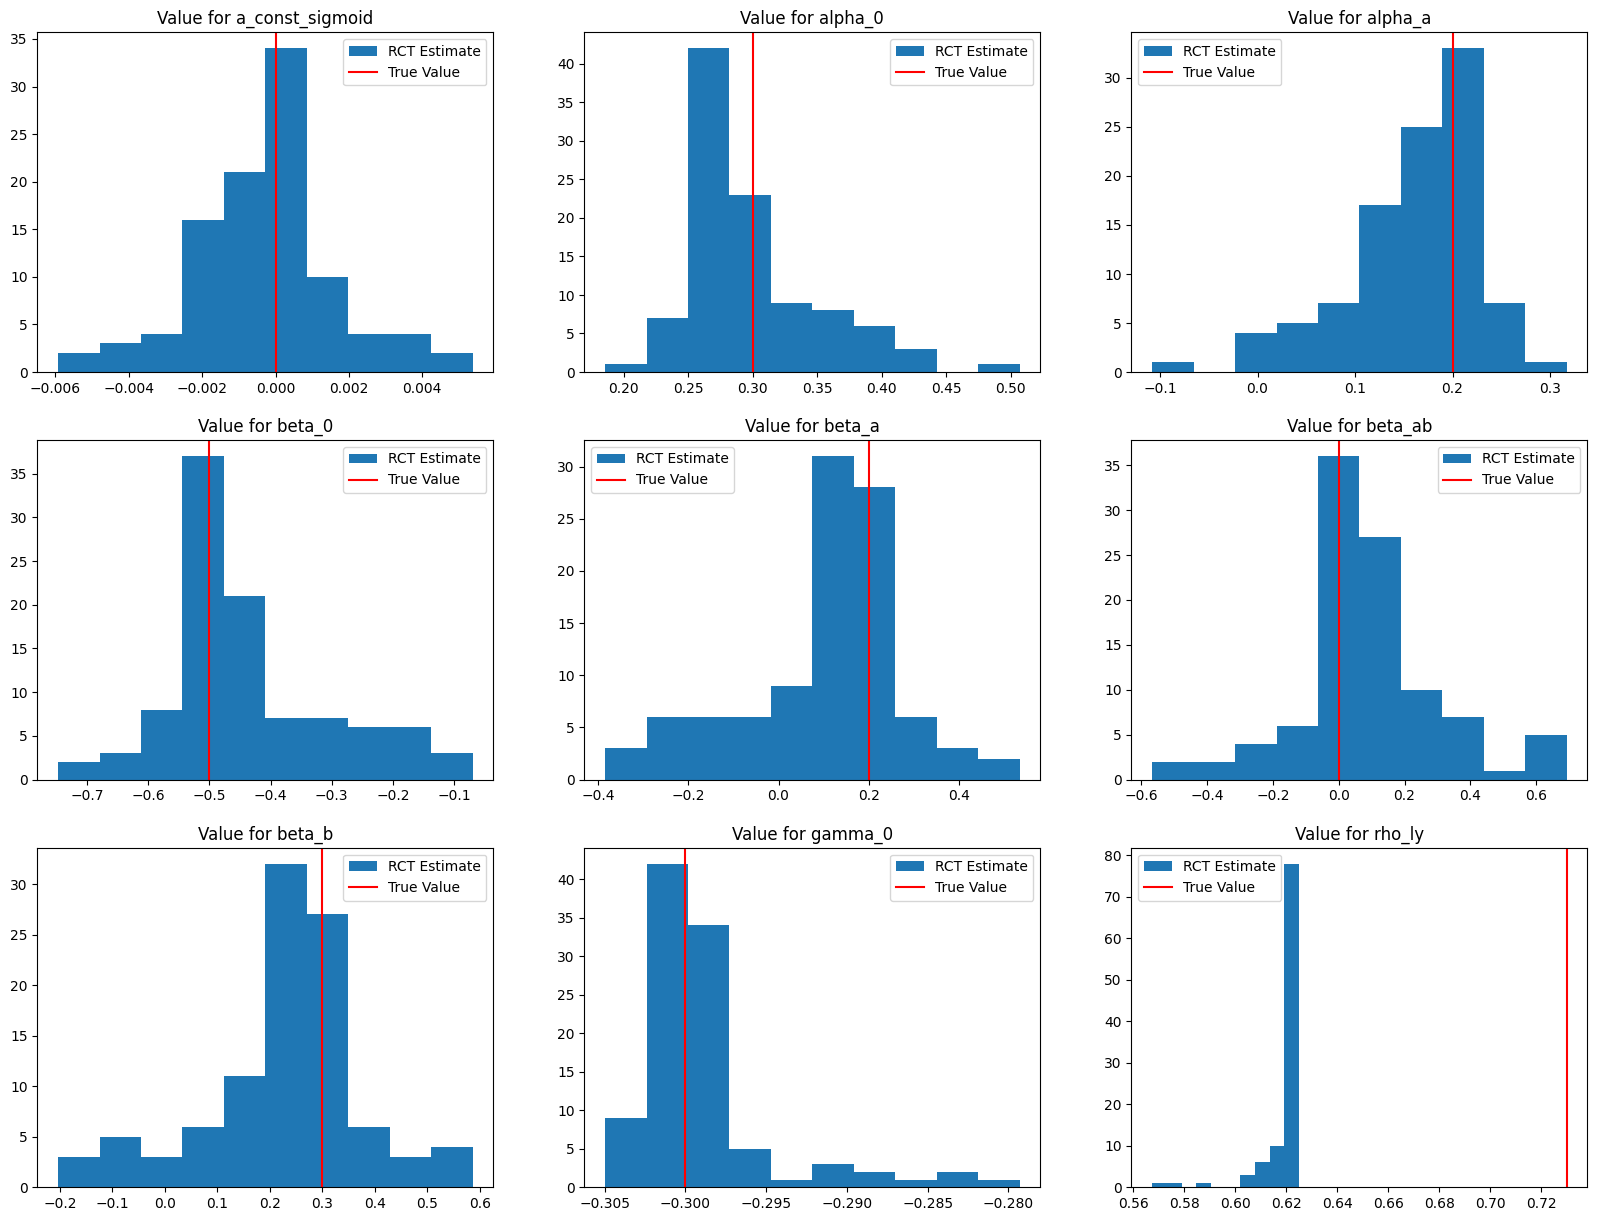

In [11]:
f, axs = plt.subplots(3, 3, figsize=(20, 15))

param_names = list(rct_params.keys())
for i, ax in enumerate(f.axes):
    ax.hist(np.array(rct_params[param_names[i]]), label='RCT Estimate')
    ax.axvline(true_params[param_names[i]], color='r', label='True Value')
    # li.set_label('True Value')
    ax.title.set_text(f'Value for {param_names[i]}')
    ax.legend()